In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from utils import *
from models import *
from optimizers import *

(569, 30)
Highest accuracy is: 0.98


<AxesSubplot:xlabel='lambda', ylabel='Accuracy'>

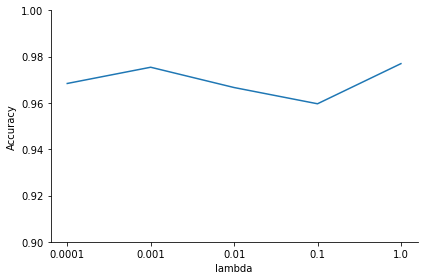

In [19]:
# Definitions
c_values = [1e0, 1e1, 1e2, 1e3, 1e4]
ksplits = 5

np.random.seed(15)
c_values.reverse()

# Load dataset
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

print(X.shape)

# Cross-validation 
kfold = KFold(n_splits=ksplits, shuffle=True)

# Iterate over folds and c values
accs = []
for c in c_values:
    
    folds_acc = []
    for fold, (train_ind, test_ind) in enumerate(kfold.split(X)):

        # Get train and test data for this fold
        X_train , X_test = X[train_ind], X[test_ind]
        y_train, y_test = y[train_ind], y[test_ind]

        # Scale data
        scaler = StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Instantiate svm classifier
        clf = svm.SVC(C=c, random_state=2)

        # Fit to data
        clf.fit(X_train_scaled, y_train)

        # Predict on test set
        y_hat = clf.predict(X_test_scaled)
        
        # Determine accuracy
        acc = np.mean(y_hat == y_test)    
        folds_acc.append(acc)
        
    accs.append(folds_acc)

# Mean over folds
accs = np.mean(accs, axis=0)

print('Highest accuracy is: {}'.format(np.round(np.max(accs), 2)))
    
# To compare with logistic regression, the c-values (regularization parameter) are inversed.
# Acc. to sklearn: alpha (or lambda) = 1/C
lambda_values = [1/c for c in c_values]

# Plot to save
plot_metric(y=accs, x=np.arange(len(lambda_values)), nx_ticks=lambda_values, save=True, x_label='lambda', y_label='Accuracy', 
           name='h_test_accuracy', y_limit=[0.9, 1])



(569, 30)
Highest accuracy is: 0.98


<AxesSubplot:xlabel='lambda', ylabel='Accuracy'>

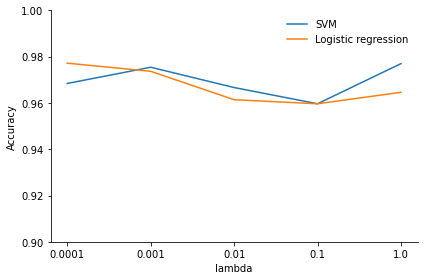

In [20]:
# Take lambda values from before 
lbds = lambda_values

# Use best performing learning rate from task g)
lr = 0.01

# Load dataset
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

print(X.shape)

# Cross-validation 
kfold = KFold(n_splits=ksplits, shuffle=True)

# Iterate over folds and c values
accs_lr = []
for lbd in lbds:
    
    folds_acc = []
    for fold, (train_ind, test_ind) in enumerate(kfold.split(X)):

        # Get train and test data for this fold
        X_train , X_test = X[train_ind], X[test_ind]
        y_train, y_test = y[train_ind], y[test_ind]

        # Scale data
        scaler = StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Instantiate model
        logreg = LogisticRegression(fit_intercept=False,
                      dimension= X_train_scaled.shape[1],
                      random_init=True,
                      reduction='mean',
                      l2_reg =True,
                      lbd=lbd)
                        
        optimizer = SGD(lr=lr)
        
        logreg.train(X_train_scaled, y_train, optimizer, batch_size=1, epochs=1000)     

        # find accuracy on test set with beta_opt
        y_pred_prob = np.zeros((len(y_test),2))
        y_pred_prob[:,1] = logreg.predict(X_test_scaled)
        y_pred_prob[:,0] = 1-logreg.predict(X_test_scaled)
        
        # Determine accuracy
        acc = np.mean(np.argmax(y_pred_prob, axis=1)== y_test)
        folds_acc.append(acc)
        
    accs_lr.append(folds_acc)
    
# Mean over folds
accs_lr = np.mean(accs_lr, axis=0)

print('Highest accuracy is: {}'.format(np.round(np.max(accs_lr), 2)))

y = [accs, accs_lr]
legend = ['SVM', 'Logistic regression']

# Plot to save
plot_metric(y=y, x=np.arange(len(lambda_values)), nx_ticks=lambda_values, save=True, x_label='lambda', y_label='Accuracy', 
           name='h_comparison', legend=legend, y_limit=[0.9, 1])